In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores):

In [3]:
cols = [] 
for col in customer_df.columns: 
    cols.append(col.lower().replace(' ', '_')) 
customer_df.columns = cols

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

Change effective to date column to datetime format:

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [6]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Check NaN values per column:

In [7]:
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

Defining the numerical columns:

In [8]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


No ID columns to be dropped!

Usally discrete values have the type int and continuous are normally float, therefore the following is valid.

In [9]:
def descnumericaltypes(df,types):
    num_dis = []
    num_cont = []
    num = df.select_dtypes(include=np.number)
    for i in num.columns:
        if 'number' in i:
            num_dis.append(i)
        else:
            num_cont.append(i)
    if types == 'discrete':
        x = num[num_dis]
    else:
        x = num[num_cont]
    return x

descnumericaltypes(numericals,'discrete')

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [10]:
descnumericaltypes(numericals,'continuous')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


We end up with that:
continuous = 'customer_lifetime_value', 'income', 'monthly_preimum_auto', 'months_since_last_claim', 'months_since_policy_inception','total_claim_amount'
discrete = 'number_of_open_complaints','number_of_policies'

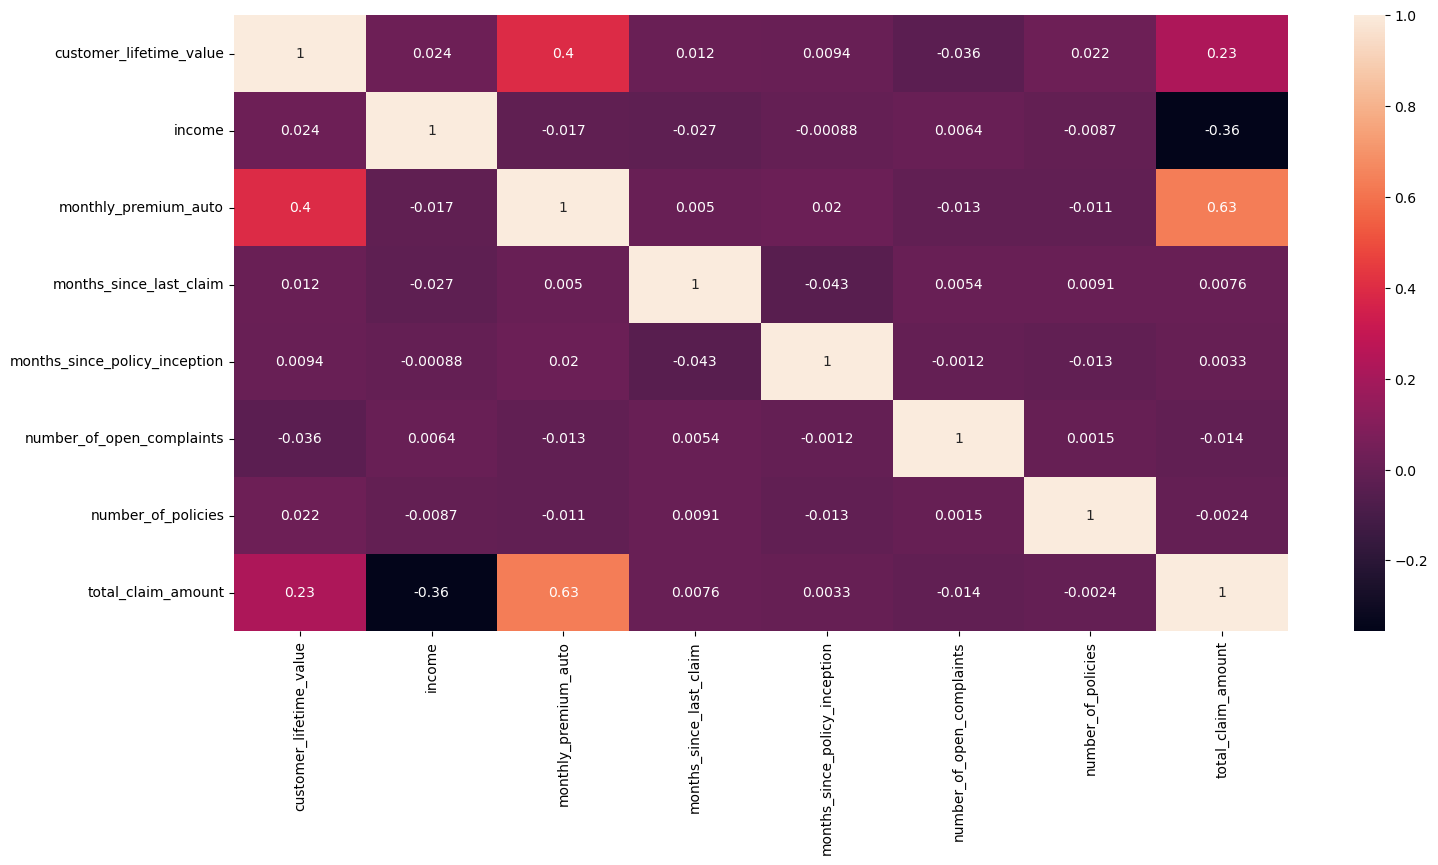

In [11]:
corr_matrix=numericals.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(17, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

The highest correlation is between the monthly_preimum_auto and total_claim_amount.

In [12]:
continuous_df = descnumericaltypes(numericals,'continuous')

In [13]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [14]:
discrete_df = descnumericaltypes(numericals,'discrete')

In [15]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   number_of_open_complaints  9134 non-null   int64
 1   number_of_policies         9134 non-null   int64
dtypes: int64(2)
memory usage: 142.8 KB


In [16]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


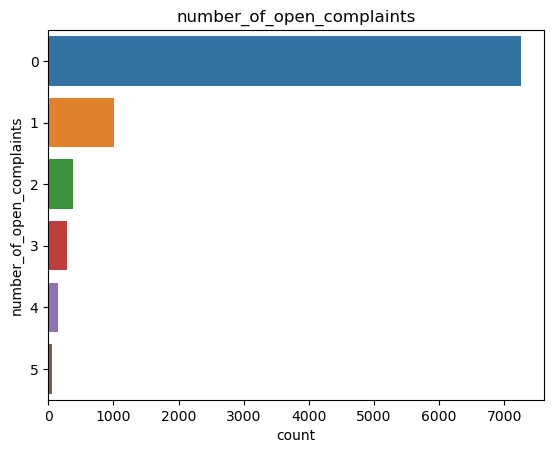

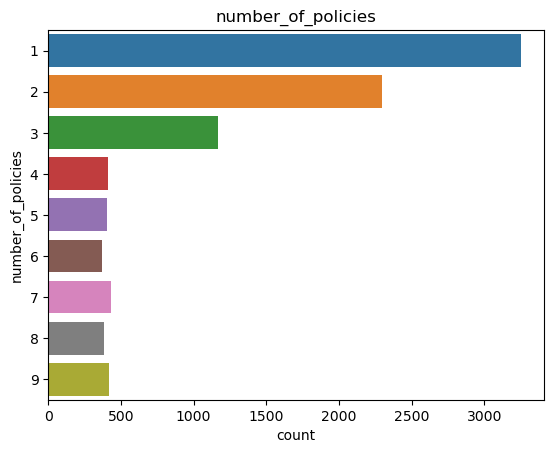

In [17]:
def plot_dis(df):
    for i in df.columns:
        plt.figure()
        plt.title(format(i))
        sns.countplot(data=df, y=i)
        
plot_dis(discrete_df)

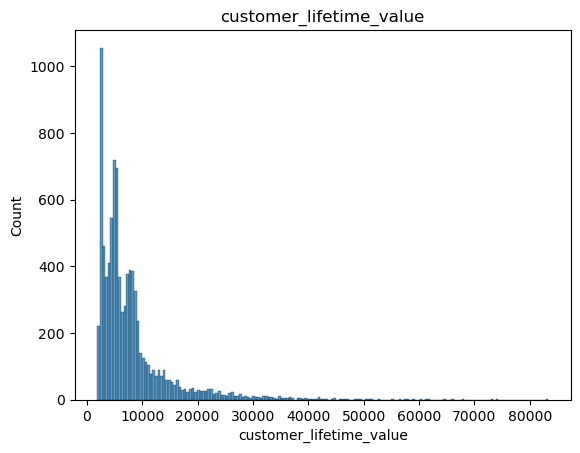

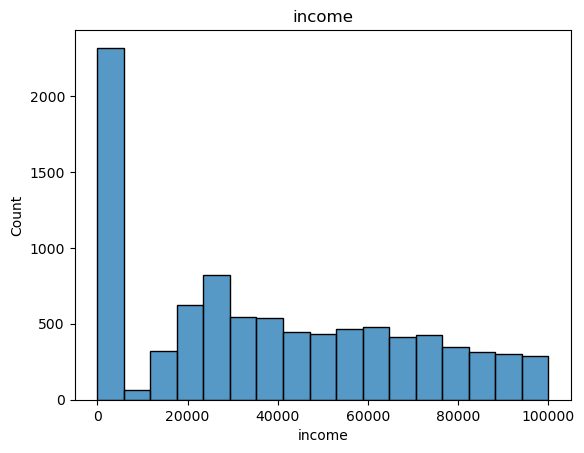

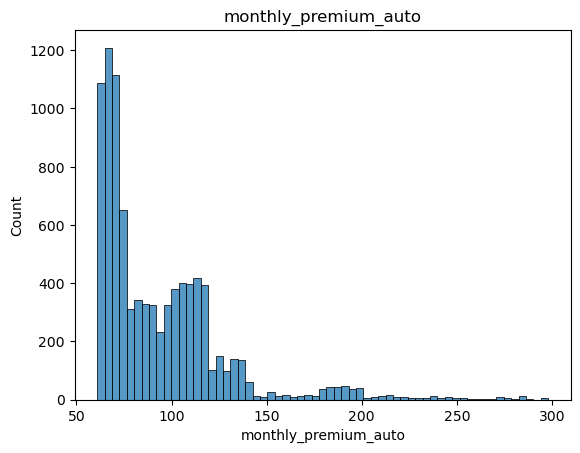

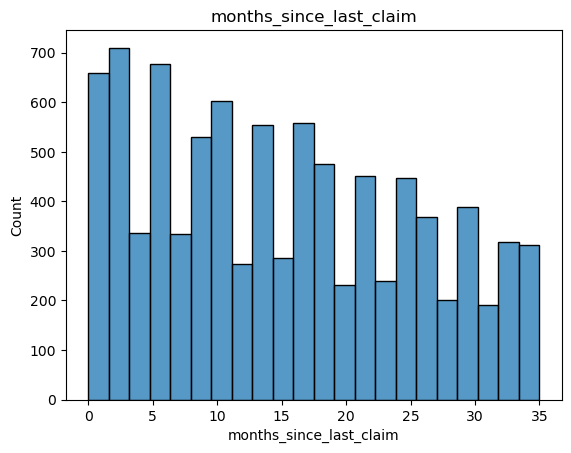

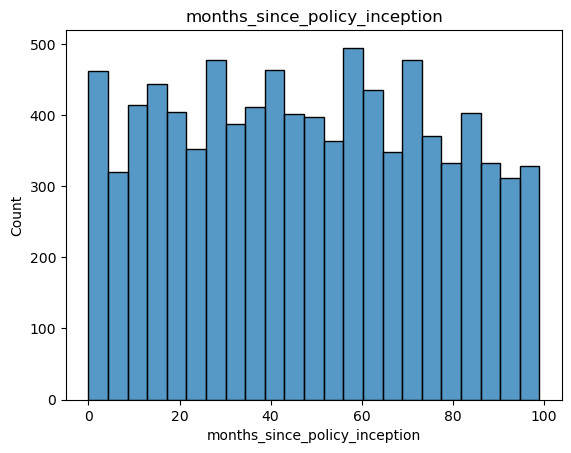

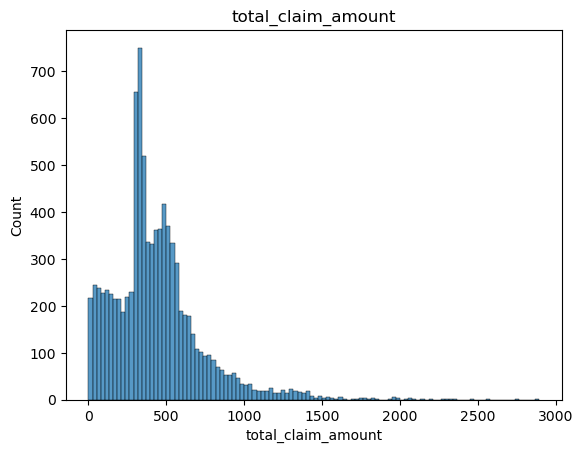

In [18]:
def plot_count(df):
    for i in df.columns:
        plt.figure()
        plt.title(format(i))
        sns.histplot(x=i,data=df)
plot_count(continuous_df)

Accourding to the histograms plotted above, doing a transformation would be necessary.

Using the same function but now to plot boxplots in order to check if the box plotting can show us the outliers better that the histplot:

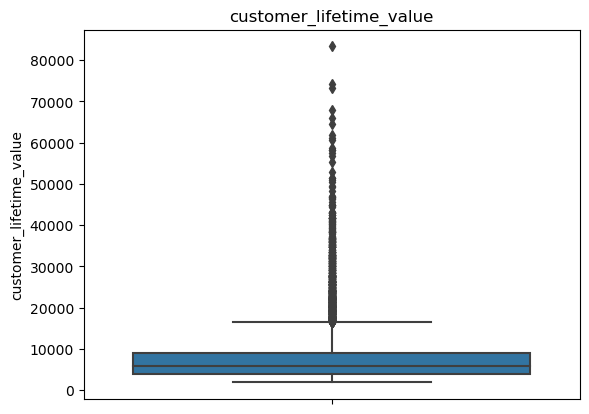

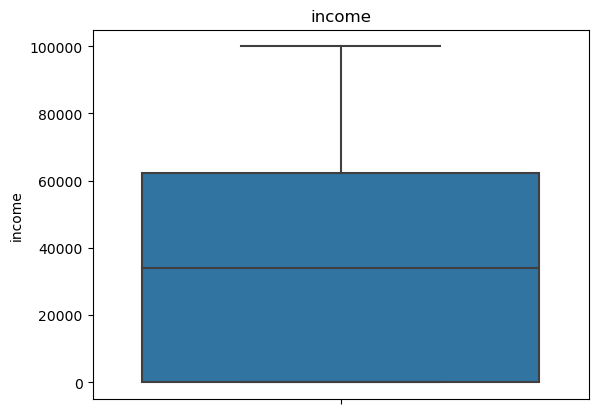

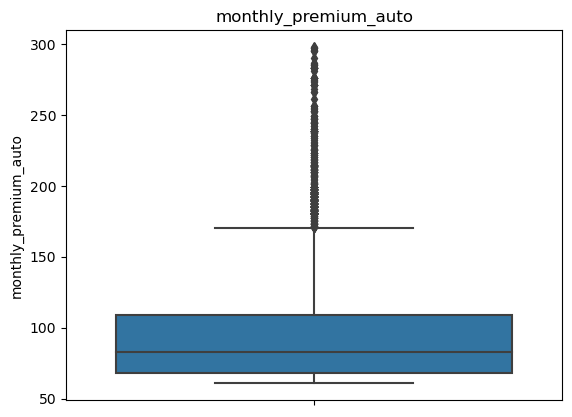

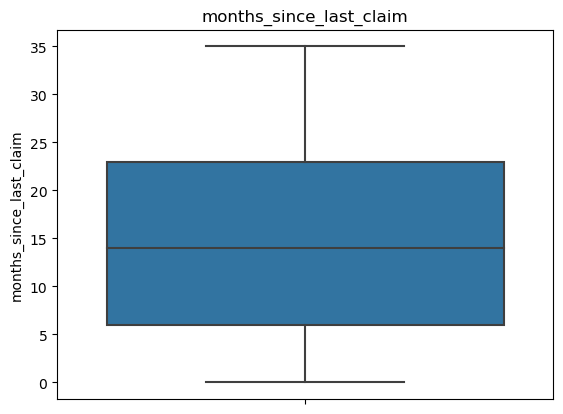

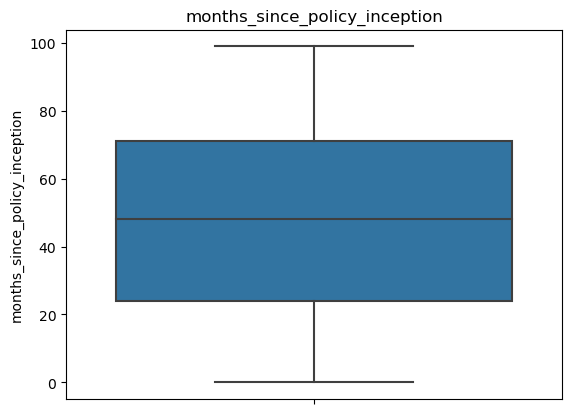

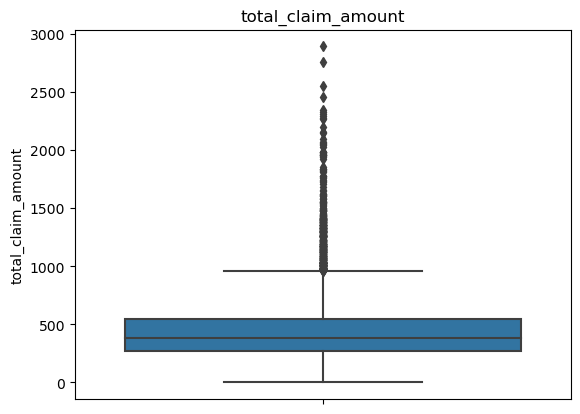

In [19]:
def box_count(df):
    for i in df.columns:
        plt.figure()
        plt.title(format(i))
        sns.boxplot(data=df, y=i)
box_count(continuous_df)

## Here the  Lab Cleaning Categorical Data starts:

In [20]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [21]:
categorical_df = categorical_df.drop(columns=['customer'])
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


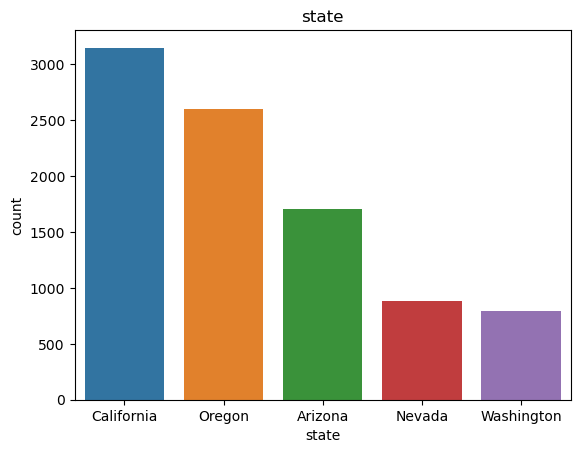

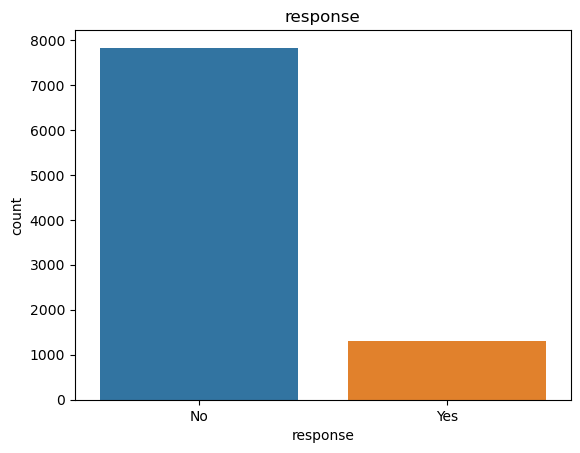

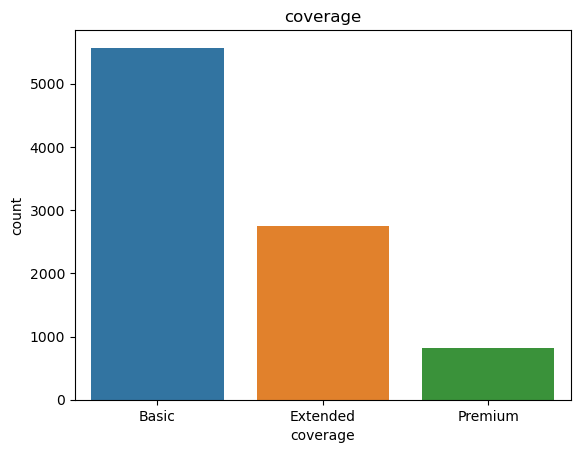

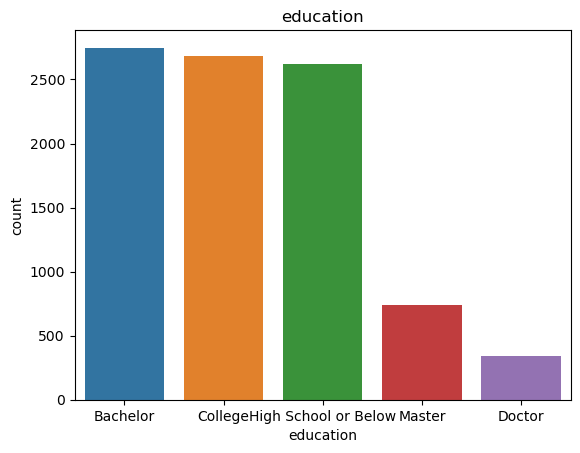

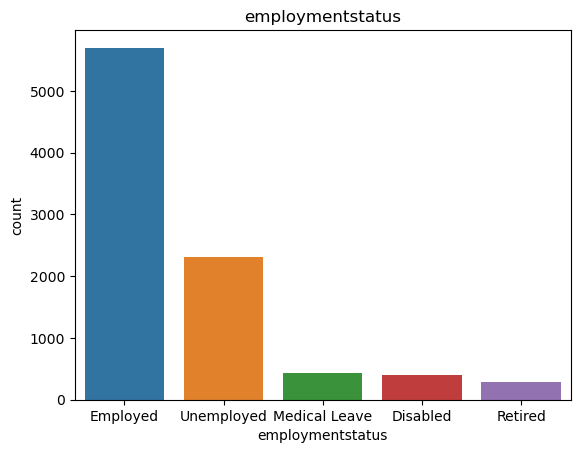

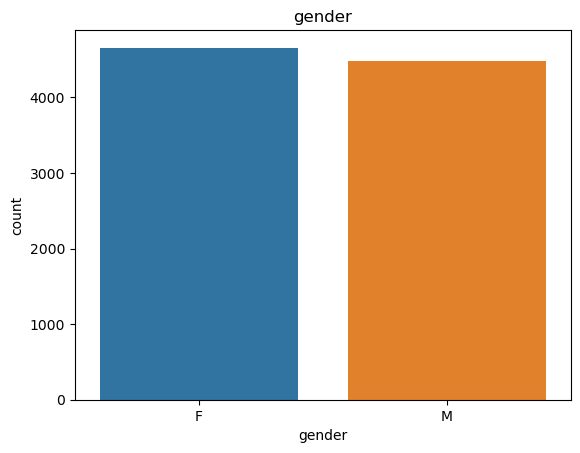

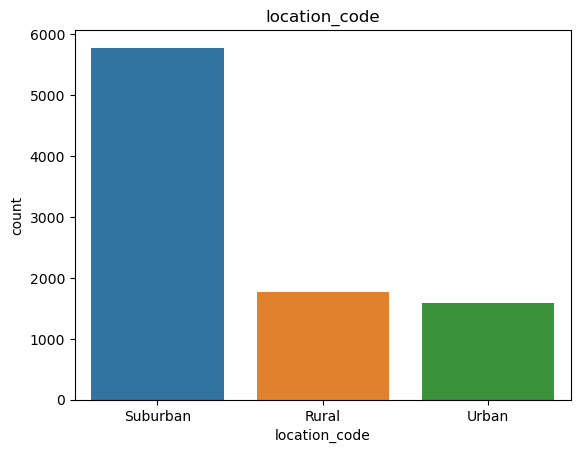

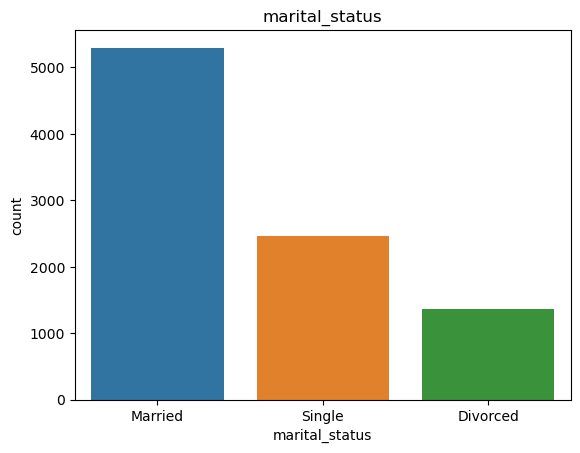

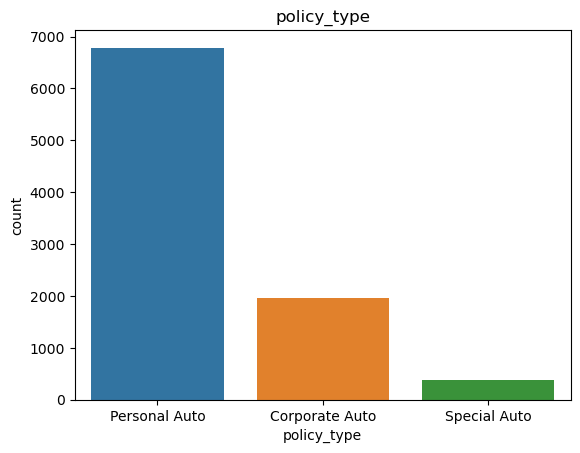

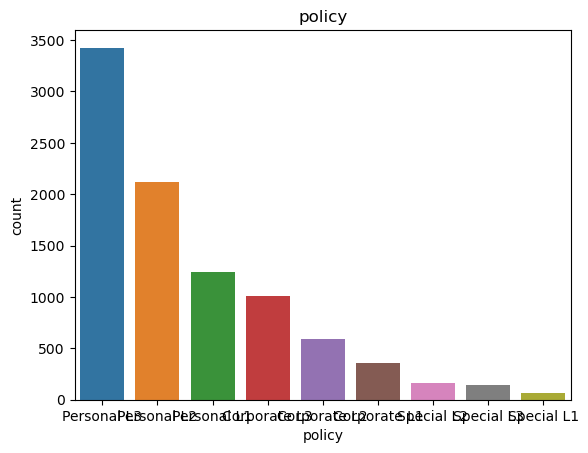

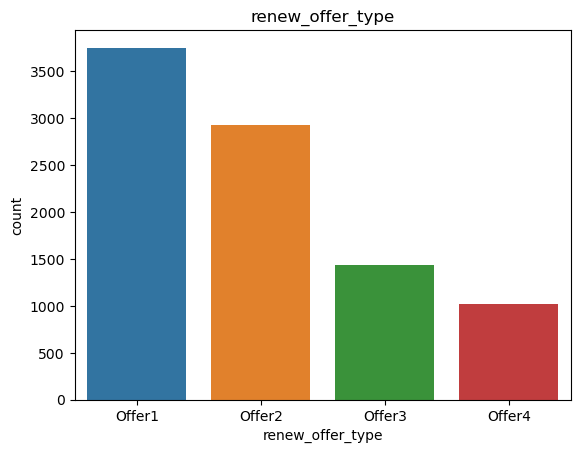

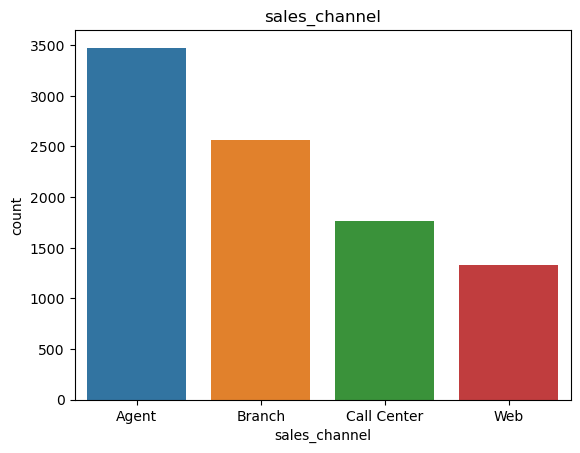

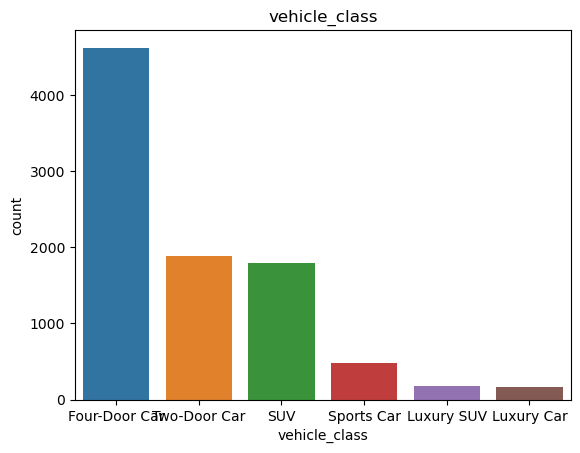

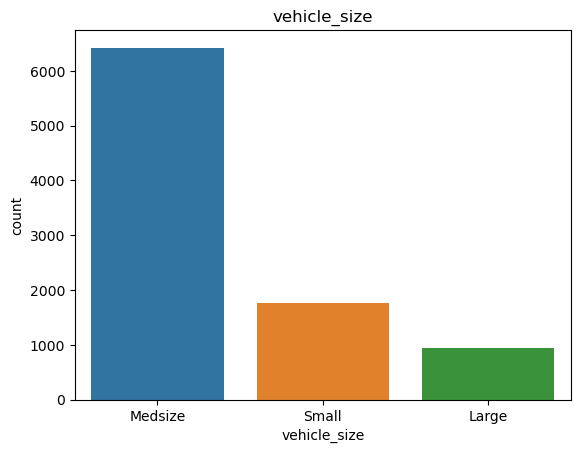

In [22]:
def catbyfreq(df):
    for i in df.columns:
        plt.figure()
        plt.title(format(i))
        sns.countplot(data=df, x=i, order= df[i].value_counts(dropna=False).index)

catbyfreq(categorical_df)

In [23]:
categorical_df = categorical_df.drop(columns=['policy_type'])
categorical_df.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [24]:
pattern = r'^.*?(?=L)'
categorical_df['policy'] = categorical_df['policy'].str.replace(pattern, '')

# test transformed data
categorical_df.head(2)

/var/folders/9w/sc50fcc10kn5s181xfyx15080000gp/T/ipykernel_12839/3934480385.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df['policy'] = categorical_df['policy'].str.replace(pattern, '')


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize


Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

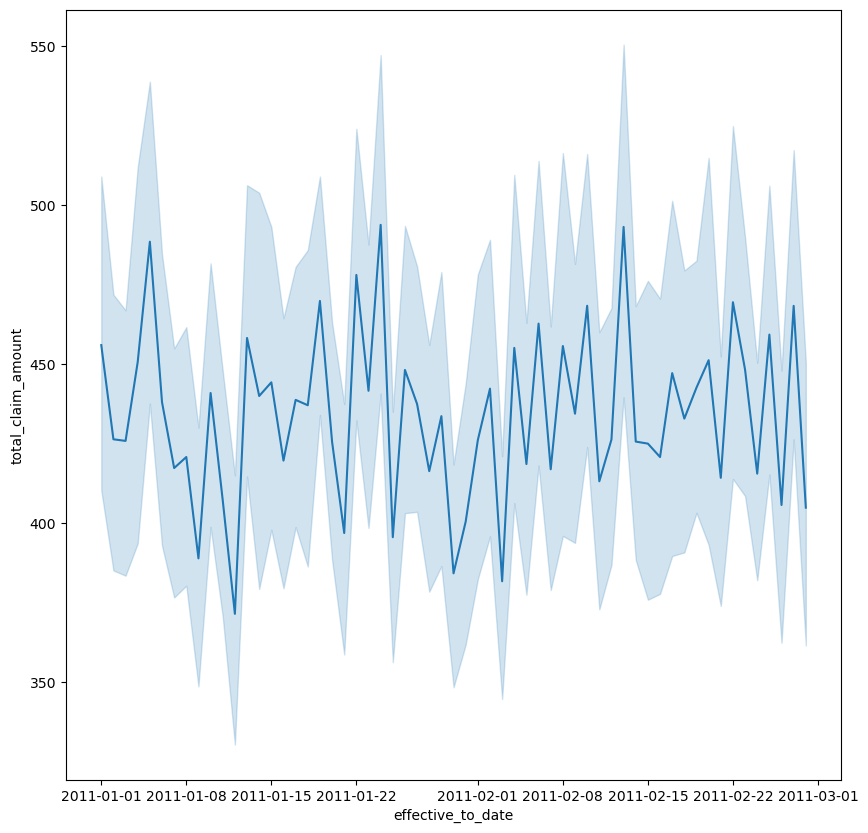

In [25]:
plt.figure(figsize=(10,10))
sns.lineplot(x='effective_to_date',y='total_claim_amount', data = customer_df)
plt.show()

In [26]:
new_df = pd.concat([customer_df['effective_to_date'], customer_df['total_claim_amount']], axis=1)
new_df.head(2)

,effective_to_date,total_claim_amount
0,2011-02-24,384.811147
1,2011-01-31,1131.464935


In [27]:
date_df = pd.DataFrame()
date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_df['week'] = customer_df['effective_to_date'].dt.week
date_df['month'] = customer_df['effective_to_date'].dt.month_name()
date_df['year'] = customer_df['effective_to_date'].dt.year
date_df['total_claim_amount'] = customer_df['total_claim_amount']

/var/folders/9w/sc50fcc10kn5s181xfyx15080000gp/T/ipykernel_12839/4010957063.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date_df['week'] = customer_df['effective_to_date'].dt.week


In [28]:
date_df.head()

,day,day_name,week,month,year,total_claim_amount
0,24,Thursday,8,February,2011,384.811147
1,31,Monday,5,January,2011,1131.464935
2,19,Saturday,7,February,2011,566.472247
3,20,Thursday,3,January,2011,529.881344
4,3,Thursday,5,February,2011,138.130879


Did not manage to reindex the plot down neither the groupby.

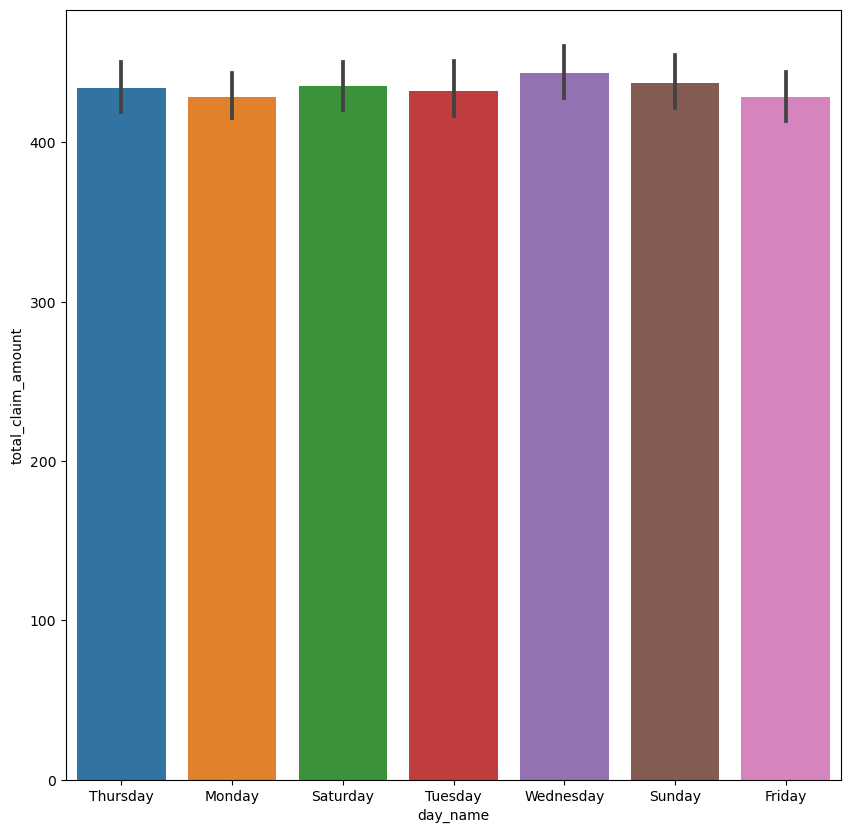

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='day_name',y='total_claim_amount', data = date_df)
plt.show()

In [30]:
day_tot = date_df.groupby(['day_name'])['total_claim_amount'].sum().round(2)
day_tot

day_name
Friday       533658.79
Monday       655689.71
Saturday     608060.10
Sunday       581655.66
Thursday     541820.80
Tuesday      502518.93
Wednesday    541563.05
Name: total_claim_amount, dtype: float64

In [31]:
median_by_day = date_df.groupby('day_name')['total_claim_amount'].median().reset_index()
median_by_day.sort_values('total_claim_amount', ascending=False, inplace=True)

print(median_by_day)

    day_name  total_claim_amount
4   Thursday          395.328407
6  Wednesday          392.235698
1     Monday          385.735705
3     Sunday          383.721164
2   Saturday          379.200000
5    Tuesday          378.490829
0     Friday          371.803029


<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

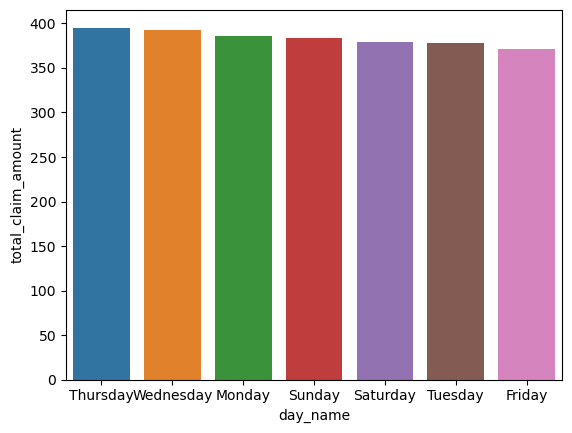

In [32]:
sns.barplot(x='day_name', y='total_claim_amount', data=median_by_day)

In [33]:
month_target = date_df.groupby(['month'])['total_claim_amount'].sum().round(2)
month_target

month
February    1847824.19
January     2117142.86
Name: total_claim_amount, dtype: float64

In [34]:
def remove_outliers(df, thr=3):
    for col in df._get_numeric_data().columns:
        mean = df[col].mean()
        std = df[col].std()
        lower = mean - thr * std
        upper = mean + thr * std
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

continuous_df_clean = remove_outliers(continuous_df)

continuous_df_clean.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [35]:
continuous_df_clean.shape

(8575, 6)

In [36]:
final_df = pd.concat([continuous_df_clean, discrete_df, categorical_df, date_df], axis = 1)

In [37]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies,state,response,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,year,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1,Washington,No,...,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,2011,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8,Arizona,No,...,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,2011,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2,Nevada,No,...,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,2011,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7,California,No,...,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,2011,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1,Washington,No,...,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,2011,138.130879


In [38]:
final_df = final_df.dropna()

In [39]:
final_df.shape

(8575, 27)

In [40]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies,state,response,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,year,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,0,1,Washington,No,...,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,2011,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,1131.464935,0,8,Arizona,No,...,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,2011,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,0,2,Nevada,No,...,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,2011,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,529.881344,0,7,California,No,...,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,2011,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,138.130879,0,1,Washington,No,...,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,2011,138.130879


In [41]:
cols = list(final_df.columns)
cols.remove("total_claim_amount")
final_df = final_df[cols + ["total_claim_amount"]]

In [42]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,vehicle_size,day,day_name,week,month,year,total_claim_amount,total_claim_amount,total_claim_amount,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0,1,Washington,No,Basic,...,Medsize,24,Thursday,8,February,2011,384.811147,384.811147,384.811147,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0,8,Arizona,No,Extended,...,Medsize,31,Monday,5,January,2011,1131.464935,1131.464935,1131.464935,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0,2,Nevada,No,Premium,...,Medsize,19,Saturday,7,February,2011,566.472247,566.472247,566.472247,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0,7,California,No,Basic,...,Medsize,20,Thursday,3,January,2011,529.881344,529.881344,529.881344,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0,1,Washington,No,Basic,...,Medsize,3,Thursday,5,February,2011,138.130879,138.130879,138.130879,138.130879


In [43]:
final_df['response'] = final_df['response'].map({'Yes': 1, 'No': 0})

In [44]:
final_df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'}, inplace=True)

/var/folders/9w/sc50fcc10kn5s181xfyx15080000gp/T/ipykernel_12839/4210740161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'}, inplace=True)


In [45]:
final_df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired':'Inactive'}, inplace=True)

/var/folders/9w/sc50fcc10kn5s181xfyx15080000gp/T/ipykernel_12839/1036537845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired':'Inactive'}, inplace=True)


In [46]:
mask = final_df.columns.duplicated(keep='first')
final_df = final_df.loc[:, ~mask]

In [47]:
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,year,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0,1,Washington,0,Basic,...,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,2011,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0,8,Arizona,0,Extended,...,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,2011,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0,2,Nevada,0,Premium,...,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,2011,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0,7,California,0,Basic,...,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,2011,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0,1,Washington,0,Basic,...,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,2011,138.130879


In [49]:
final_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [50]:
final_df['gender'] = final_df['gender'].map({'F': 1, 'M': 0})

In [51]:
final_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car':'Luxury'}, inplace=True)

In [52]:
final_df['coverage'].replace({'Basic':1, 'Extended':2, 'Premium':3}, inplace=True)

In [53]:
final_df['employmentstatus'].replace({'Unemployed':1, 'Inactive':2, 'Employed':3}, inplace=True)

In [54]:
final_df['location_code'].replace({'Rural':1, 'Suburban':2, 'Urban':3}, inplace=True)

In [55]:
final_df['vehicle_size'].replace({'Large':1, 'Medsize':2, 'Large':3}, inplace=True)

In [58]:
cat_nom_df = final_df.select_dtypes(include=['object', 'category'])
cat_nom_df.head()

,state,education,employmentstatus,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,month
0,Washington,Bachelor,3,Married,L3,Offer1,Agent,Two-Door Car,2,Thursday,February
1,Arizona,Bachelor,1,Single,L3,Offer3,Agent,Four-Door Car,2,Monday,January
2,Nevada,Bachelor,3,Married,L3,Offer1,Agent,Two-Door Car,2,Saturday,February
3,California,Bachelor,1,Married,L2,Offer1,Call Center,SUV,2,Thursday,January
4,Washington,Bachelor,3,Single,L1,Offer1,Agent,Four-Door Car,2,Thursday,February


In [63]:
levels = {col_name: col.unique().tolist() for col_name, col in cat_nom_df.iteritems()}#God save google
levels

{'state': ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 'education': ['Bachelor',
  'College',
  'Master',
  'High School or Below',
  'Doctor'],
 'employmentstatus': [3, 1, 'Medical Leave', 'Disabled', 'Retired'],
 'marital_status': ['Married', 'Single', 'Divorced'],
 'policy': ['L3', 'L2', 'L1'],
 'renew_offer_type': ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 'sales_channel': ['Agent', 'Call Center', 'Web', 'Branch'],
 'vehicle_class': ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 'vehicle_size': [2, 'Small', 3],
 'day_name': ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday'],
 'month': ['February', 'January']}